In [637]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [638]:
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from pandas_profiling import ProfileReport
import scipy.stats as stats
import statsmodels.formula.api as sm

%pylab inline

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
#plt.figure(figsize=(1,1))

Populating the interactive namespace from numpy and matplotlib


In [639]:
hrdf = pd.read_csv("C:\\Users\\hp\\Desktop\\Data Science\\ML\\Logistic Regression\\Logistic Regression files\\2. Case Study - HR Analytics\\HR_comma_sep.csv")

# EDA

In [640]:
hrdf.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],
      dtype='object')

In [641]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [642]:
hrdf.shape

(14999, 10)

In [643]:
hrdf.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [644]:
ProfileReport(hrdf)

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [645]:
# seprate out categorical and numerical variables
cat_variables=[]
num_variables=[]

for variable in hrdf.columns:
#    print hrdf[variable].dtype
    if hrdf[variable].dtype in ['object']:
        cat_variables.append(variable)
    else:
        num_variables.append(variable)
        
print cat_variables
print num_variables

['department', 'salary']
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


In [646]:
hrdf['salary'].dtype.name

'object'

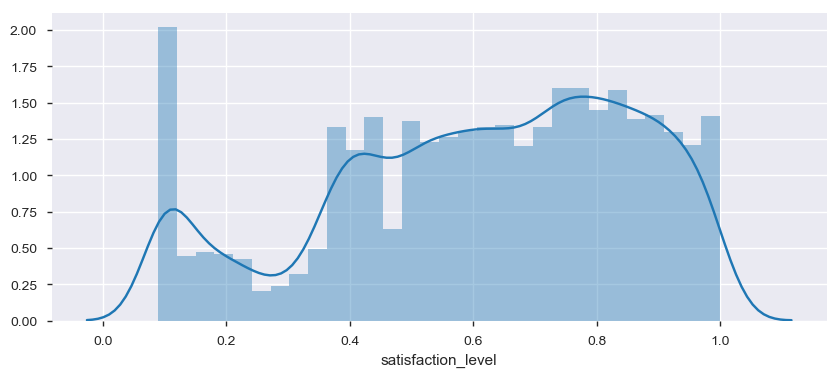

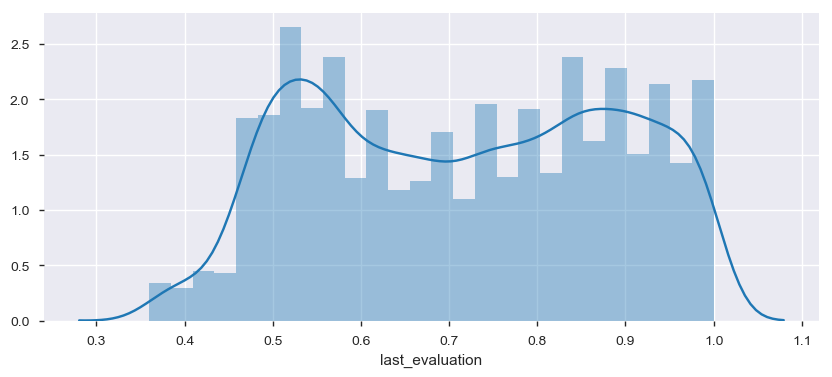

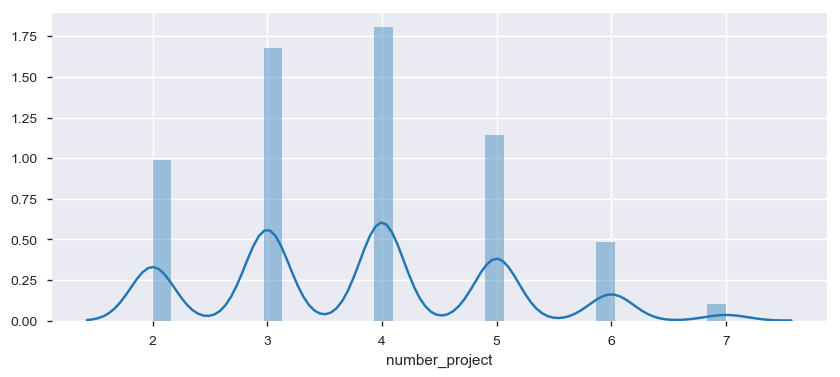

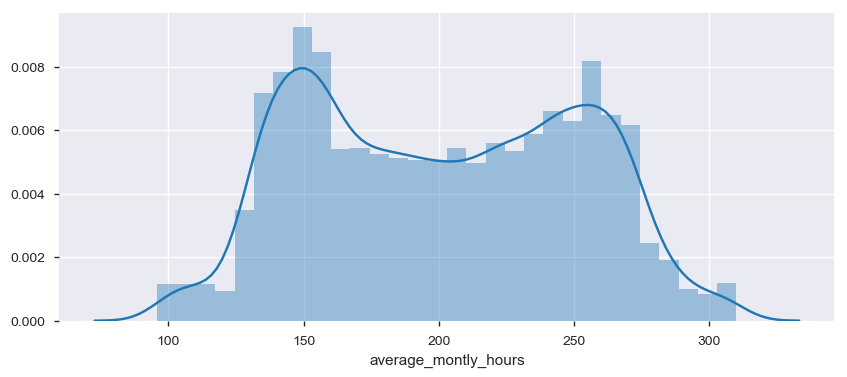

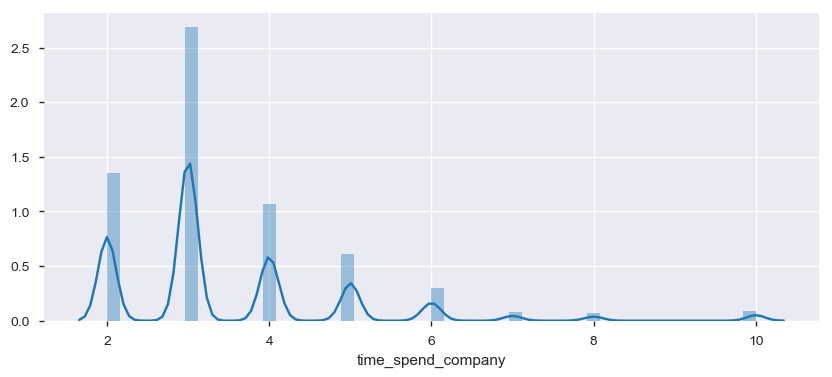

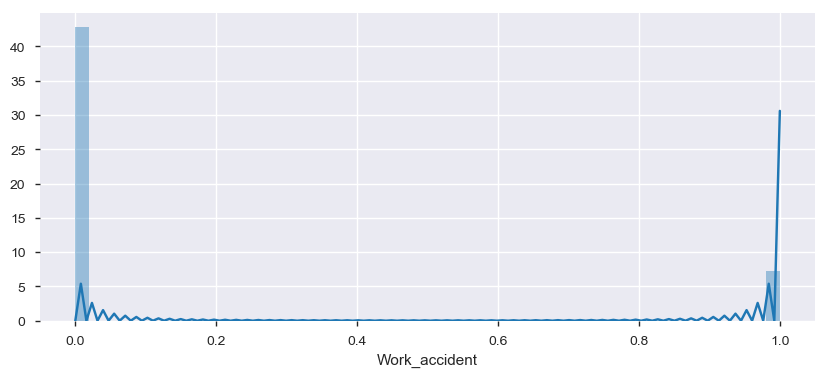

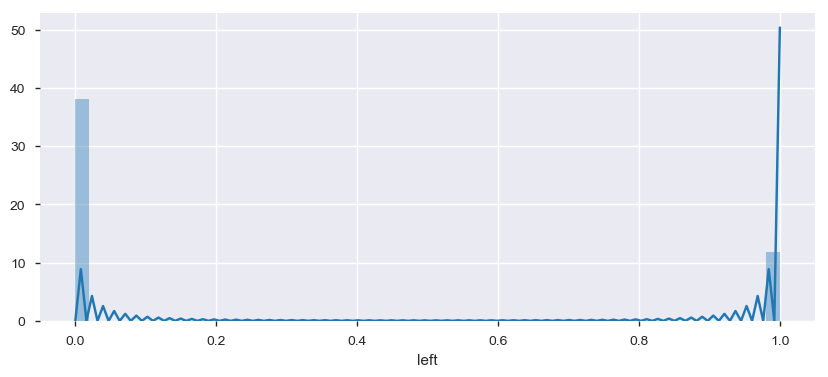

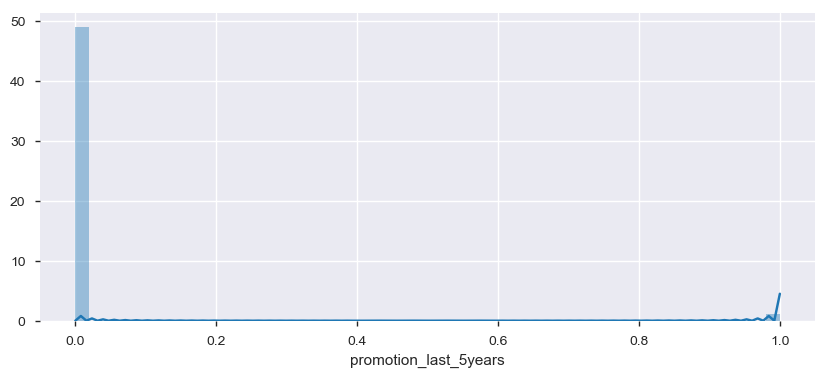

In [647]:
#Univariant Analysis
# for numerical variables Histogram
for var in num_variables:
    plt.subplots(figsize=(10,4))
    sns.distplot(hrdf[var])
  
    

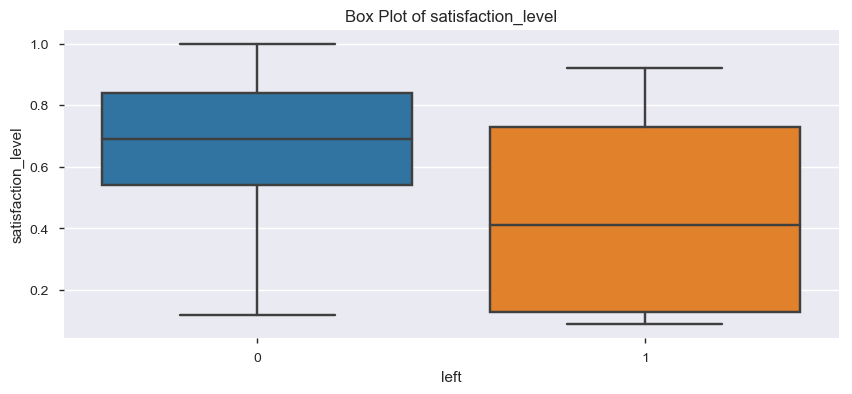

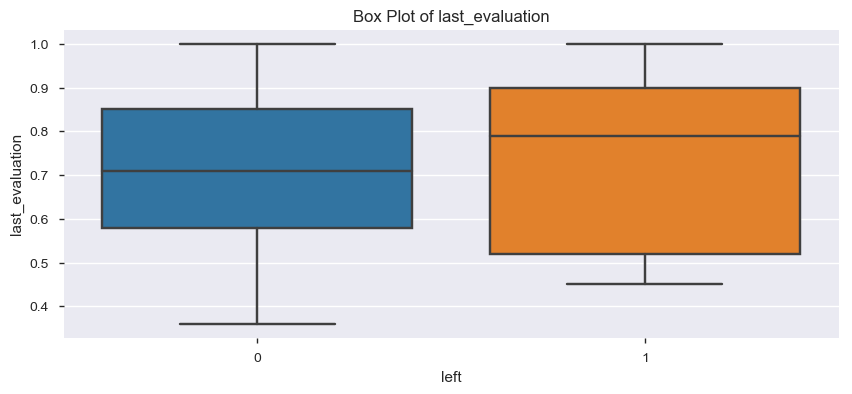

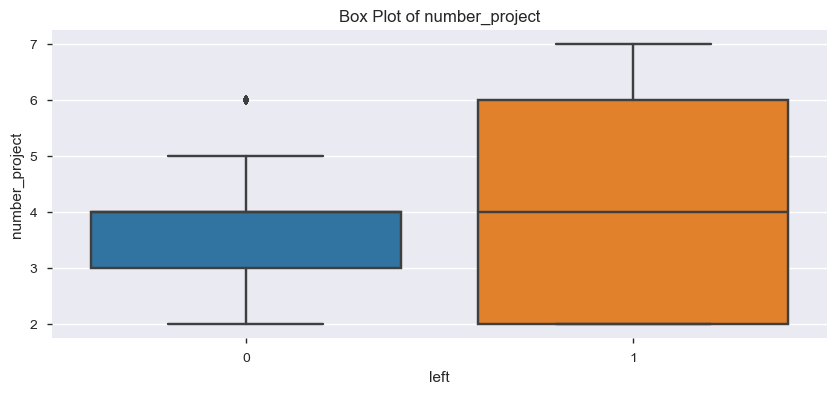

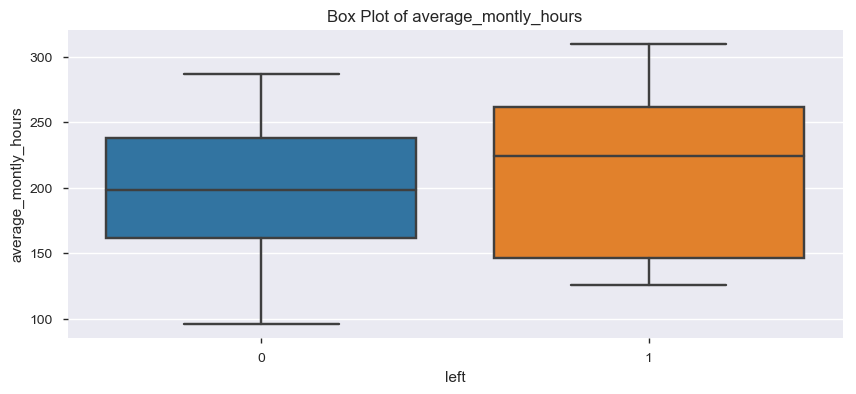

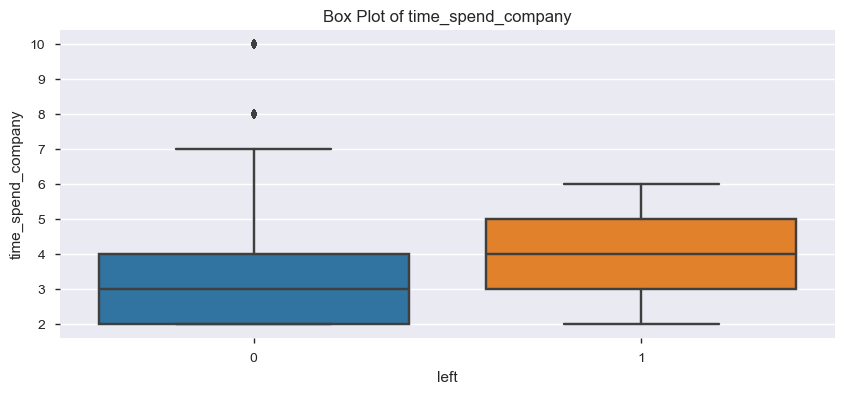

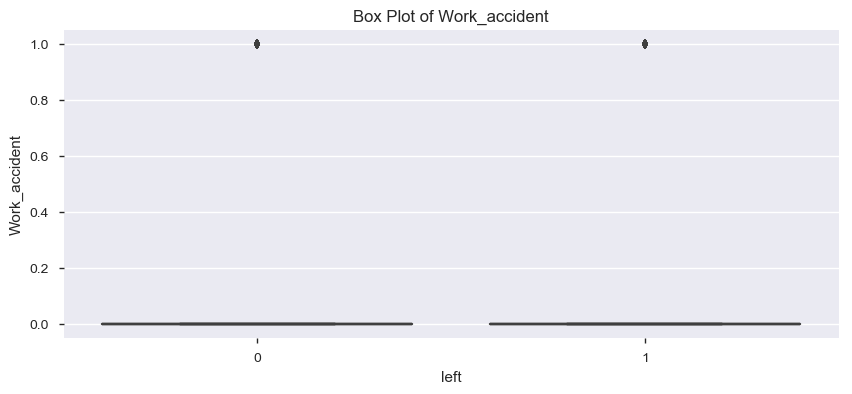

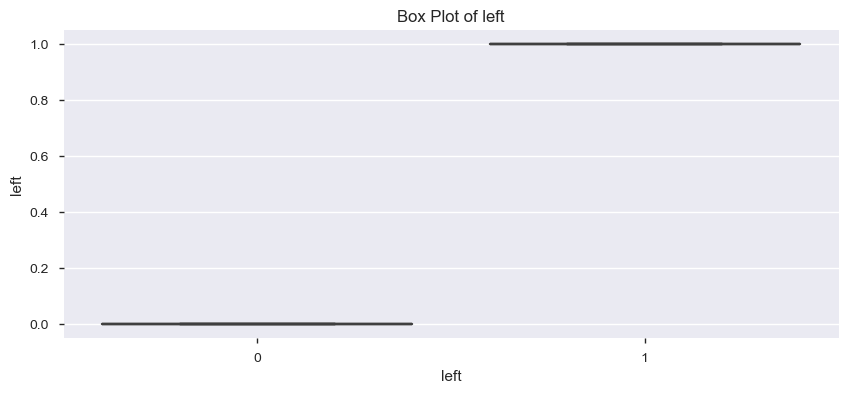

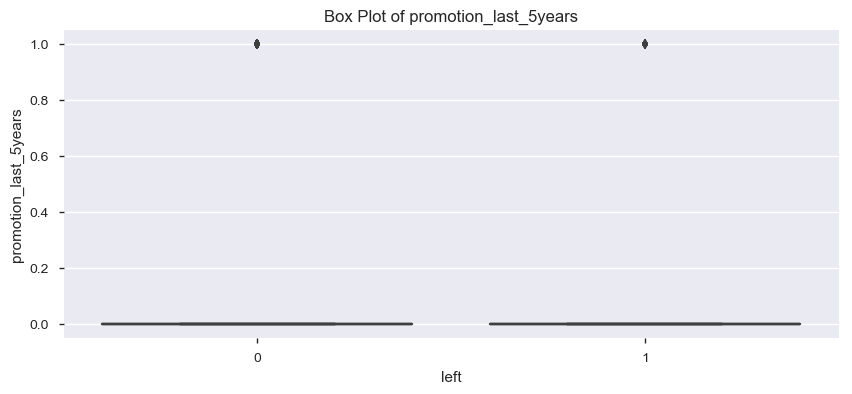

In [648]:
# for numerical variables Box Plot
# outlier Detection and Variable Importance
# The Matplotlib subplot() function can be called to plot two or more plots in one figure. 

bp = PdfPages('Split.pdf')

for num in num_variables:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='left', y=num, data = hrdf)
    plt.title(str('Box Plot of ') + str(num))
    bp.savefig(fig)
bp.close()

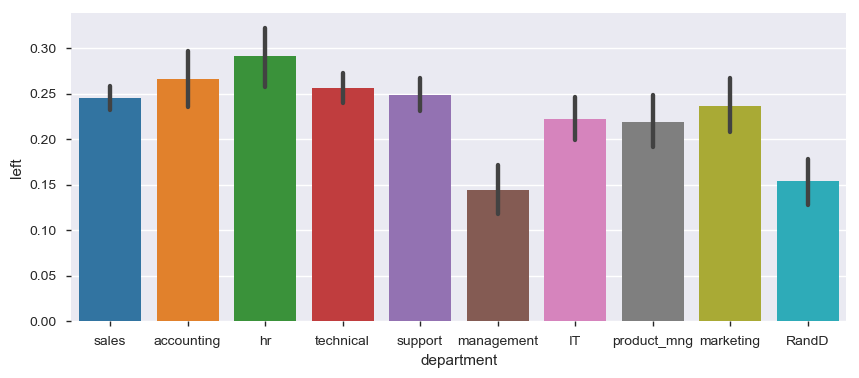

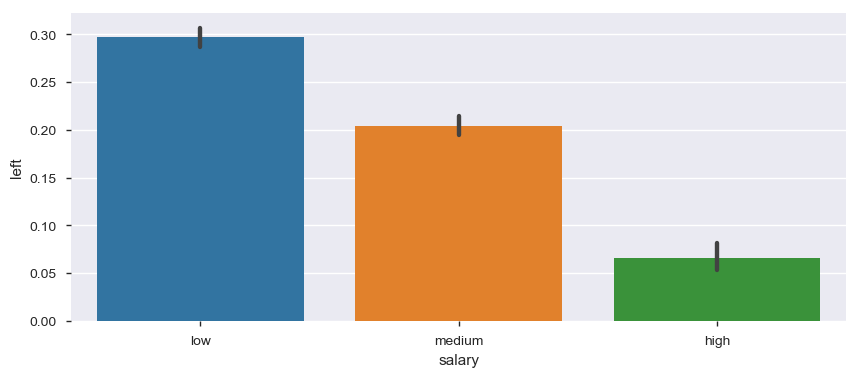

In [649]:
# for categorical variables Bar Chart

for num in cat_variables:
    plt.subplots(figsize=(10,4))
    sns.barplot(x=num,y='left',data=hrdf)


# Missing Value Treatment

In [650]:
#missing value treatement
# no missing value found.
hrdf_num=hrdf[num_variables]
hrdf_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
dtypes: float64(2), int64(6)
memory usage: 937.5 KB


# Outliers Treatment

In [651]:
# only 'time_spend_company' requires outlier treatment
hrdf_num['time_spend_company']= hrdf_num['time_spend_company'].clip_upper(threshold=8)

In [652]:
hrdf_num.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.469698,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.348026,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,8.000000,1.000000,1.000000,1.000000


# Feature Engineering 

#### Variable Transformation

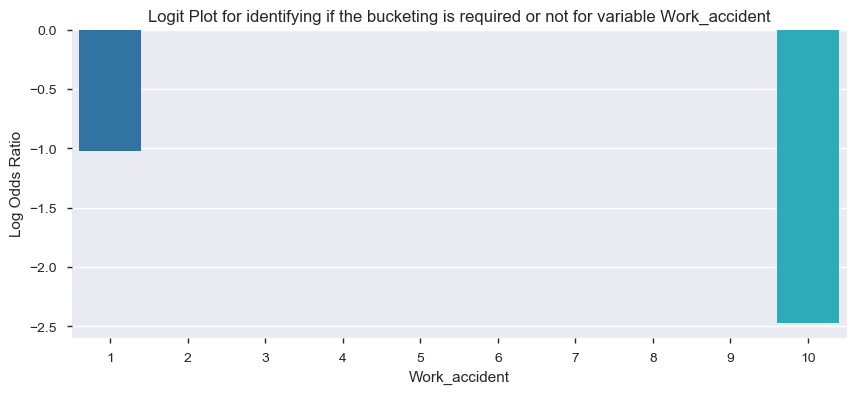

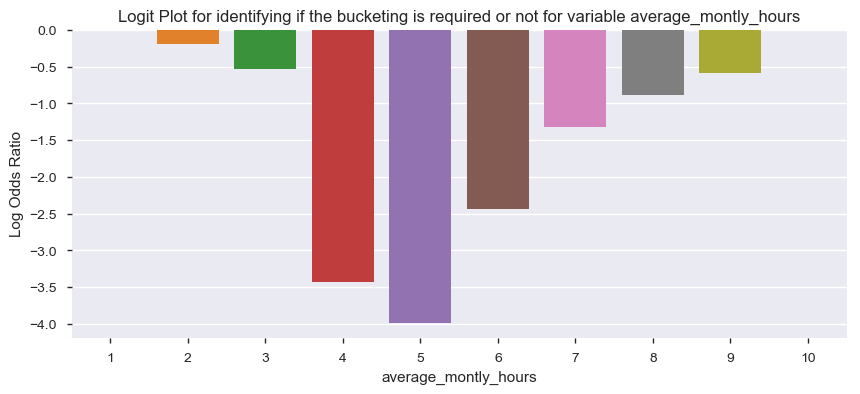

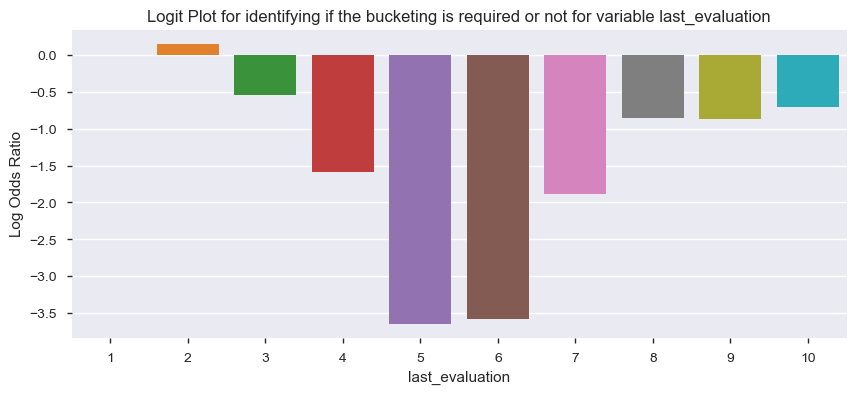

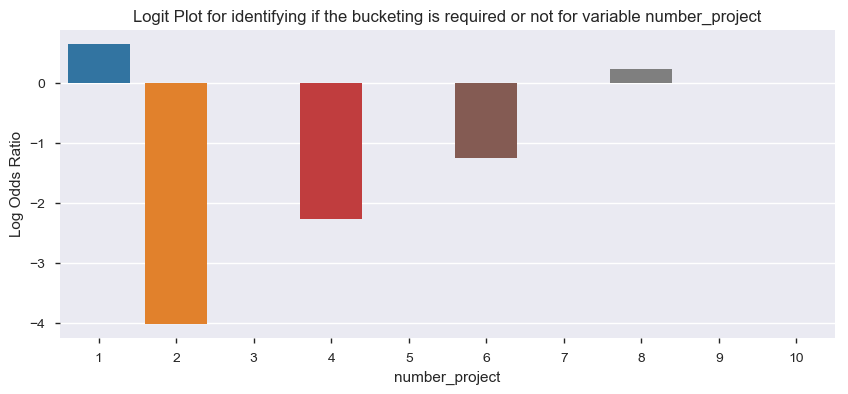

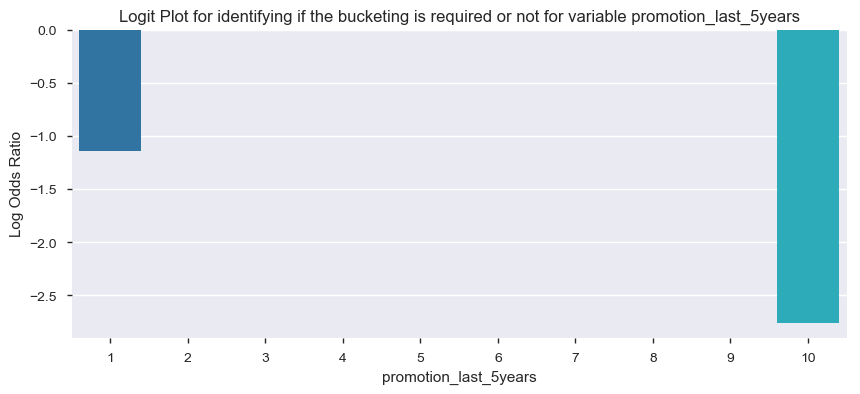

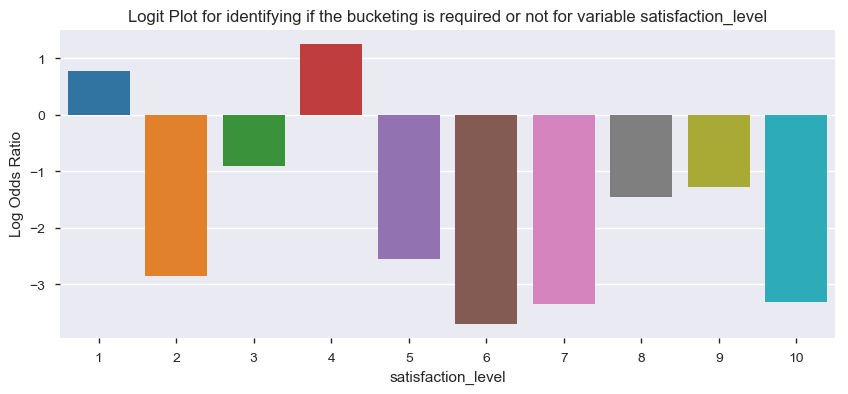

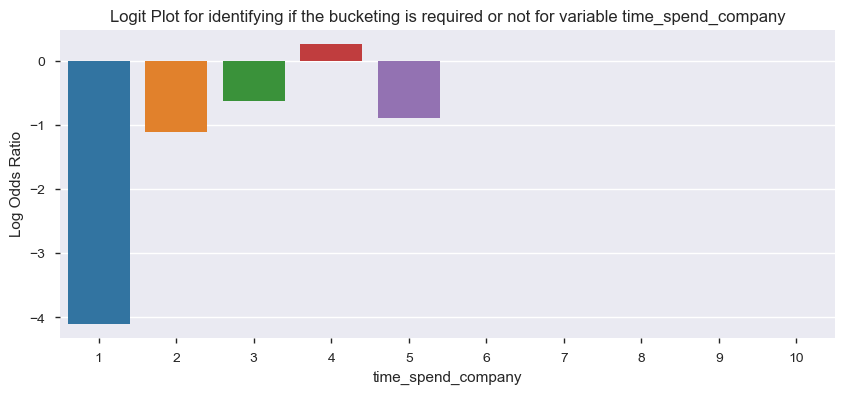

In [653]:
# Method 1- Make the relation monotonic - WOE(weight of evidance)


for num_variable in hrdf.columns.difference(['left','salary','department']):
    binned = pd.cut(hrdf[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = hrdf.groupby(binned)['left'].sum() / (hrdf.groupby(binned)['left'].count()-hrdf.groupby(binned)['left'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
   

In [654]:
# Method 2 Make the relation monotonic - Bucketing
hrdf[['average_montly_hours', 'last_evaluation']].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
average_montly_hours,14999.0,201.050337,49.943099,96.00,137.00,150.00,162.00,181.00,200.00,220.00,238.00,253.00,267.00,310.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.49,0.54,0.59,0.65,0.72,0.78,0.84,0.89,0.95,1.0


In [655]:
# monthly hours & last_evaluation bucekting
hrdf['monthly_hrs_extreme'] = hrdf['average_montly_hours'].apply(lambda x: 0 if 162 < x < 221 else 1)
hrdf['last_evaluation_extreme'] = hrdf['last_evaluation'].apply(lambda x: 0 if 0.6 <= x < 0.84 else 1)
hrdf['last_evaluation_extreme'].value_counts()


1    9470
0    5529
Name: last_evaluation_extreme, dtype: int64

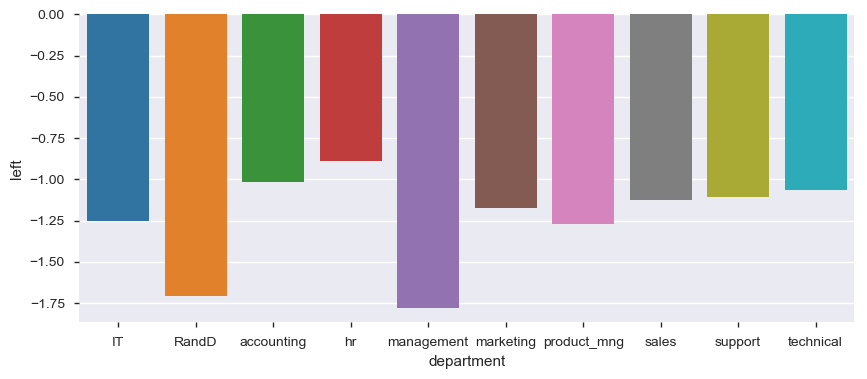

In [656]:
ser = hrdf.groupby('department')['left'].sum() / (hrdf.groupby('department')['left'].count()-hrdf.groupby('department')['left'].sum())
ser = np.log(ser)
fig,axes = plt.subplots(figsize=(10,4))
sns.barplot(x=ser.index,y=ser)

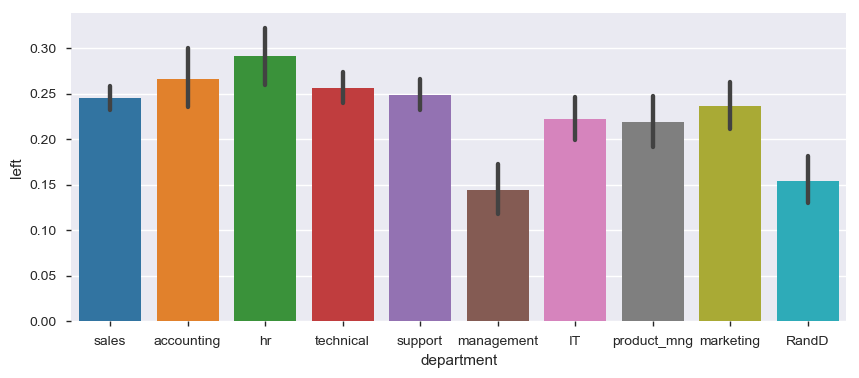

In [657]:
plt.subplots(figsize=(10,4))
sns.barplot(x='department', y='left', data=hrdf)

In [658]:
## Bucketing for department variable
department_grp = hrdf[['department','left']].groupby('department').sum() / hrdf[['department','left']].groupby('department').count()
print(department_grp.sort_values('left'))
hrdf['dept_grp'] = hrdf['department'].apply(lambda x: 'Low' if x in ['management', 'RandD'] else 
                   'medium' if x in ['product_mng', 'IT', 'marketing', 'sales', 'support', 'technical'] else 'high')

                 left
department           
management   0.144444
RandD        0.153748
product_mng  0.219512
IT           0.222494
marketing    0.236597
sales        0.244928
support      0.248991
technical    0.256250
accounting   0.265971
hr           0.290934


In [659]:
# Create Dummy Variables
get_dummies = pd.get_dummies(data=hrdf['dept_grp'], prefix='dept', drop_first=True)
hrdf = pd.concat([hrdf, get_dummies], axis=1)


get_dummies = pd.get_dummies(data=hrdf['salary'], prefix='salary', drop_first=True)
pd.concat([hrdf, get_dummies], axis=1)
hrdf = pd.concat([hrdf, get_dummies], axis=1)
hrdf.columns


Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary',
       u'monthly_hrs_extreme', u'last_evaluation_extreme', u'dept_grp',
       u'dept_high', u'dept_medium', u'salary_low', u'salary_medium'],
      dtype='object')

In [660]:
hrdf .head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,monthly_hrs_extreme,last_evaluation_extreme,dept_grp,dept_high,dept_medium,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1,medium,0,1,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,1,medium,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,1,medium,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1,medium,0,1,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1,medium,0,1,1,0


#### Variable Creation 

In [661]:
# not required in this case.

#### Variable Selection

In [662]:
# Categorical Variable Selection
chisq_df= pd.DataFrame()
cat_variables
for variable in cat_variables:
    cross_tab = pd.crosstab(hrdf[variable],hrdf['left'], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')



(     Variable ChiSquare      P-Value
0  department   86.8255  7.04213e-15
1      salary   381.225  1.65209e-83, '\n')


In [663]:
# Numerical Variable Selection 

tstats_df = pd.DataFrame()
for variable in num_variables:
    tstats = stats.ttest_ind(hrdf[hrdf['left']==1][variable],hrdf[hrdf['left']==0][variable])
    temp = pd.DataFrame([variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

           Variable Name T-Statistic      P-Value
0     satisfaction_level    -51.6128            0
1        last_evaluation    0.804242      0.42127
2         number_project     2.91386   0.00357521
3   average_montly_hours     8.75225   2.3113e-18
4     time_spend_company     17.9242  4.20768e-71
5          Work_accident    -19.1658  6.61305e-81
6                   left         inf            0
7  promotion_last_5years     -7.5812  3.62405e-14


In [664]:
# Somar's D
hrdf['number_project_grp'] = hrdf['number_project'].clip_lower(3)
hrdf=hrdf.drop('number_project', axis=1)
num_features = ['satisfaction_level', 'time_spend_company', 'Work_accident', 
               'promotion_last_5years', 'monthly_hrs_extreme', 'last_evaluation_extreme', 'number_project_grp']
somersd_df = pd.DataFrame()
for num_variable in  num_features:
    logreg = sm.logit(formula = str('left ~ ')+str(num_variable), data=hrdf)
    result = logreg.fit()
    summ = result.summary()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(hrdf['left'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df


Optimization terminated successfully.
         Current function value: 0.473291
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539150
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.534317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484207
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504673
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.533548
         Iterations 5


,Variable Name,SomersD
0,satisfaction_level,0.495877
0,time_spend_company,0.346659
0,Work_accident,0.127683
0,promotion_last_5years,0.0209307
0,monthly_hrs_extreme,0.341999
0,last_evaluation_extreme,0.316949
0,number_project_grp,0.125739


In [665]:
# based on somersD result remove 'Promotion_last_5years' variable becasuse it is very less related to the Y



In [666]:
hrdf.columns

Index([u'satisfaction_level', u'last_evaluation', u'average_montly_hours',
       u'time_spend_company', u'Work_accident', u'left',
       u'promotion_last_5years', u'department', u'salary',
       u'monthly_hrs_extreme', u'last_evaluation_extreme', u'dept_grp',
       u'dept_high', u'dept_medium', u'salary_low', u'salary_medium',
       u'number_project_grp'],
      dtype='object')

In [667]:
# Correlation matrix
hrdf.corr()


,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,monthly_hrs_extreme,last_evaluation_extreme,dept_high,dept_medium,salary_low,salary_medium,number_project_grp
satisfaction_level,1.000000,0.105021,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.144748,-0.088355,-0.030245,0.015593,-0.047415,0.031367,-0.252302
last_evaluation,0.105021,1.000000,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.011823,-0.006309,-0.005339,0.002238,0.005221,0.006191,0.282351
average_montly_hours,-0.020048,0.339742,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.132259,-0.054286,-0.007382,0.005841,-0.001050,0.005007,0.370132
time_spend_company,-0.100866,0.131591,0.127755,1.000000,0.002120,0.144822,0.067433,0.067372,0.047205,-0.013118,-0.036620,-0.040110,0.018299,0.200153
Work_accident,0.058697,-0.007104,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.044217,-0.045759,-0.020677,0.000332,-0.006813,0.001856,-0.028133
left,-0.388375,0.006567,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.317671,0.279815,0.031484,0.025654,0.134722,-0.068833,0.178699
promotion_last_5years,0.025605,-0.008684,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.003126,-0.026254,-0.004658,-0.073302,-0.082832,0.040985,-0.013330
monthly_hrs_extreme,-0.144748,-0.011823,0.132259,0.067372,-0.044217,0.317671,-0.003126,1.000000,0.088572,0.018256,0.004878,0.023660,-0.004759,0.068851
last_evaluation_extreme,-0.088355,-0.006309,-0.054286,0.047205,-0.045759,0.279815,-0.026254,0.088572,1.000000,0.002367,0.024949,0.037838,-0.011961,-0.017115
dept_high,-0.030245,-0.005339,-0.007382,-0.013118,-0.020677,0.031484,-0.004658,0.018256,0.002367,1.000000,-0.679056,-0.018451,0.020962,-0.014132


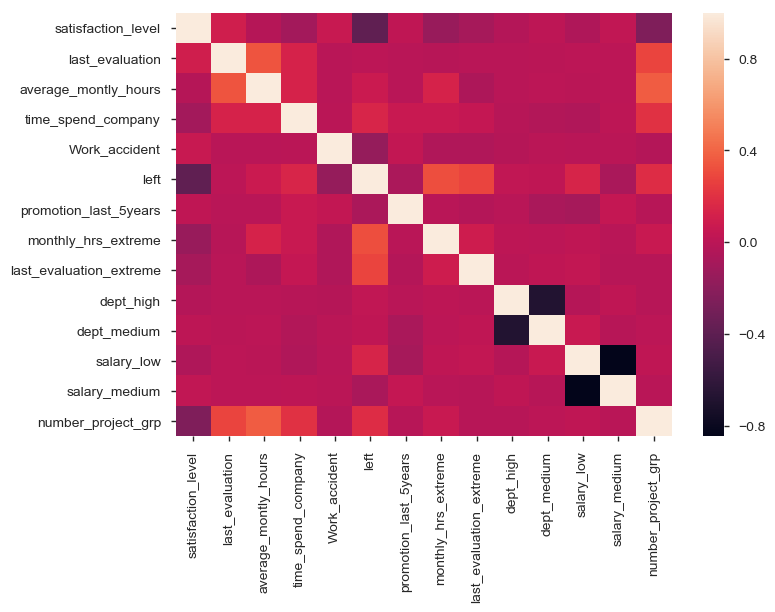

In [668]:
# HeatMap
sns.heatmap(hrdf.corr())

In [ ]:
# VIF


from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

new_features= hrdf.columns.difference(['left'])
features = "+".join(new_features)
features


y, X = dmatrices(formula_like='left ~ '+ features, data=hrdf, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)



# Model Build

In [707]:
# Train and Test Split

num_dummy_features= hrdf.columns.difference(['left','last_evaluation','average_montly_hours','promotion_last_5years','salary','department','dept_grp'])
new_hrdf = pd.concat([hrdf[num_dummy_features],hrdf['left']], axis=1)
train_x, test_x =train_test_split(new_hrdf, test_size=0.3, random_state=40)

print hrdf.columns
print num_dummy_features


Index([u'satisfaction_level', u'last_evaluation', u'average_montly_hours',
       u'time_spend_company', u'Work_accident', u'left',
       u'promotion_last_5years', u'department', u'salary',
       u'monthly_hrs_extreme', u'last_evaluation_extreme', u'dept_grp',
       u'dept_high', u'dept_medium', u'salary_low', u'salary_medium',
       u'number_project_grp'],
      dtype='object')
Index([u'Work_accident', u'dept_high', u'dept_medium',
       u'last_evaluation_extreme', u'monthly_hrs_extreme',
       u'number_project_grp', u'salary_low', u'salary_medium',
       u'satisfaction_level', u'time_spend_company'],
      dtype='object')


In [710]:
# Build Model
logreg = sm.logit(formula='left ~ '+ "+".join(num_dummy_features),data=train_x).fit()
summary=logreg.summary()
summary




Optimization terminated successfully.
         Current function value: 0.350236
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10488
Method:                           MLE   Df Model:                           10
Date:                Wed, 05 Dec 2018   Pseudo R-squ.:                  0.3651
Time:                        19:51:22   Log-Likelihood:                -3677.1
converged:                       True   LL-Null:                       -5791.8
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.2222      0.273    -22.806      0.000      -6.757      -5.687
Work_accident              -1.5744      0.114    -13.807      0.000      -1.798      -1.351
dept_high                   0.6738      0.140      4.812      0.000       0.399       0.948
dept_medium                 0.4872      0.115      4.240      0.000       0.262       0.712
last_evaluation_extreme     1.9731      0.080     24.687      0.000       1.816       2.130
monthly_hrs_extreme         2.6209      0.111     23.644      0.000       2.404       2.838
number_project_grp          0.1690      0.028      5.954      0.000       0.113       0.225
salary_low                  1.9447      0.159     12.232      0.000       1.633       2.256
salary_medium               1.3845      0.160      8.647      0.000       1.071       1.698
satisfaction_level         -3.7972      0.126    -30.072      0.000      -4.045      -3.550
time_spend_company          0.2489      0.021     12.044      0.000       0.208       0.289
===========================================================================================
"""

In [701]:
train_predicted_prob=pd.DataFrame(logreg.predict(train_x))

train_predicted_prob.columns=['prob']

train_predicted_prob.head(2)
 
train_actual=  train_y
train_predict= pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns=['actual','prob']
train_predict.head(10)

,actual,prob
12602,1,0.938565
4889,0,0.010117
1572,1,0.639028
13375,0,0.028664
879,1,0.327471
1578,1,0.942045
8765,0,0.002184
1509,1,0.461824
1896,1,0.510058
4520,0,0.292466


### find cutoff value

In [702]:
roc_like_df = pd.DataFrame()
train_temp = hr_train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    train_temp['tp'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = train_temp['tp'].sum() /float((train_temp['tp'].sum() + train_temp['fn'].sum())) 
    specificity = train_temp['tn'].sum() / float((train_temp['tn'].sum() + train_temp['fp'].sum()))

    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

roc_like_df.head(3)

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,0.981993,0.311750
0,0.040816,0.972389,0.442625


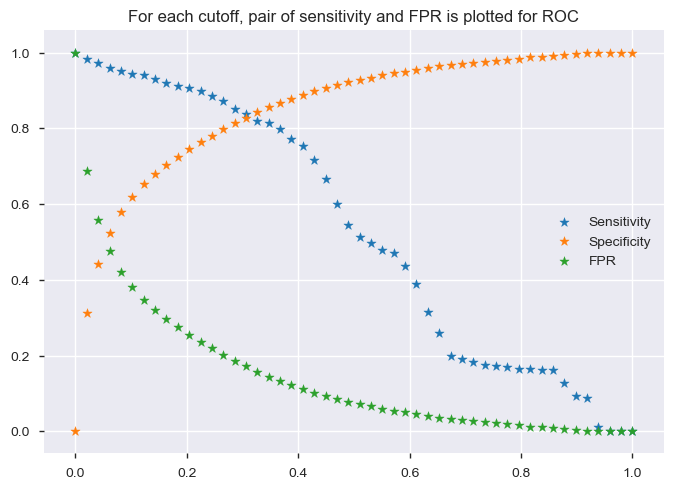

In [674]:
#plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [675]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.346939,0.813125,0.85675,1.669875


### Check Goodness of the model

In [676]:
#1st Methond - AUC

In [677]:
# 2nd Methond - c measure

In [678]:
# 3rd Method - KS

In [679]:
# 4th Methond Gini

In [711]:
# gini for development data
train_gini = 2*metrics.roc_auc_score(train_x['left'], logreg.predict()) - 1
print train_gini



0.7845907118928597


# Model Validation

### Coefficient Stability - sign and p-values

In [704]:
# for development data
logreg = sm.logit(formula='left ~ '+ "+".join(num_dummy_features),data=train_x).fit()
summary_train=logreg.summary()
summary_train

Optimization terminated successfully.
         Current function value: 0.343547
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10488
Method:                           MLE   Df Model:                           10
Date:                Wed, 05 Dec 2018   Pseudo R-squ.:                  0.3740
Time:                        19:49:59   Log-Likelihood:                -3606.9
converged:                       True   LL-Null:                       -5761.7
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.7014      0.282    -23.798      0.000      -7.253      -6.149
Work_accident              -1.5418      0.115    -13.448      0.000      -1.767      -1.317
dept_high                   0.7496      0.142      5.286      0.000       0.472       1.027
dept_medium                 0.5760      0.116      4.972      0.000       0.349       0.803
last_evaluation_extreme     2.0046      0.081     24.718      0.000       1.846       2.164
monthly_hrs_extreme         2.7691      0.116     23.973      0.000       2.543       2.995
number_project_grp          0.1945      0.029      6.784      0.000       0.138       0.251
salary_low                  2.0772      0.167     12.443      0.000       1.750       2.404
salary_medium               1.5462      0.168      9.199      0.000       1.217       1.876
satisfaction_level         -3.8648      0.127    -30.352      0.000      -4.114      -3.615
time_spend_company          0.2565      0.021     12.100      0.000       0.215       0.298
===========================================================================================
"""

In [705]:
# for training data
logreg = sm.logit(formula='left ~ '+ "+".join(num_dummy_features),data=test_x).fit()
summary_test=logreg.summary()
summary_test

Optimization terminated successfully.
         Current function value: 0.358327
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4489
Method:                           MLE   Df Model:                           10
Date:                Wed, 05 Dec 2018   Pseudo R-squ.:                  0.3473
Time:                        19:49:59   Log-Likelihood:                -1612.5
converged:                       True   LL-Null:                       -2470.6
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8180      0.403    -14.448      0.000      -6.607      -5.029
Work_accident              -1.5944      0.181     -8.798      0.000      -1.950      -1.239
dept_high                   0.4214      0.208      2.024      0.043       0.013       0.829
dept_medium                 0.2985      0.172      1.734      0.083      -0.039       0.636
last_evaluation_extreme     1.9162      0.120     16.028      0.000       1.682       2.151
monthly_hrs_extreme         2.6074      0.166     15.718      0.000       2.282       2.933
number_project_grp          0.1207      0.043      2.819      0.005       0.037       0.205
salary_low                  1.7826      0.229      7.777      0.000       1.333       2.232
salary_medium               1.1728      0.231      5.070      0.000       0.719       1.626
satisfaction_level         -3.5392      0.189    -18.750      0.000      -3.909      -3.169
time_spend_company          0.2625      0.031      8.441      0.000       0.202       0.323
===========================================================================================
"""

### gini value comparision


In [712]:
# gini for development data
train_gini_train = 2*metrics.roc_auc_score(train_x['left'], logreg.predict()) - 1
print train_gini_train


# gini for testing data
train_gini_test = 2*metrics.roc_auc_score(test_x['left'], logreg.predict(test_x)) - 1
print train_gini_test




0.7845907118928597
0.7839689843349524


### Confusion Table metrics for the same cut-off

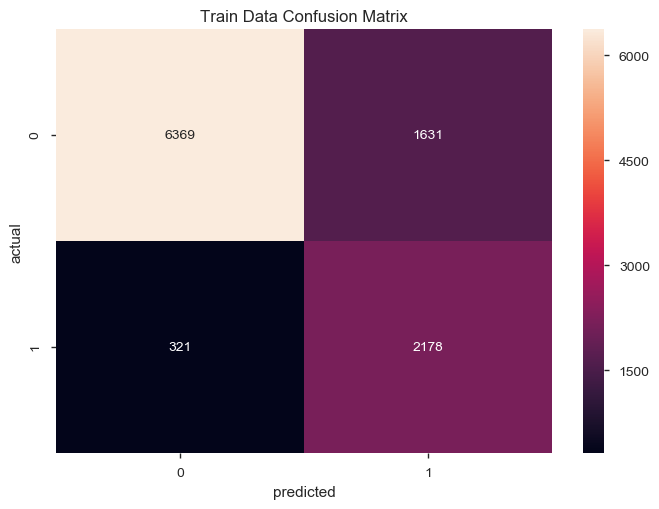

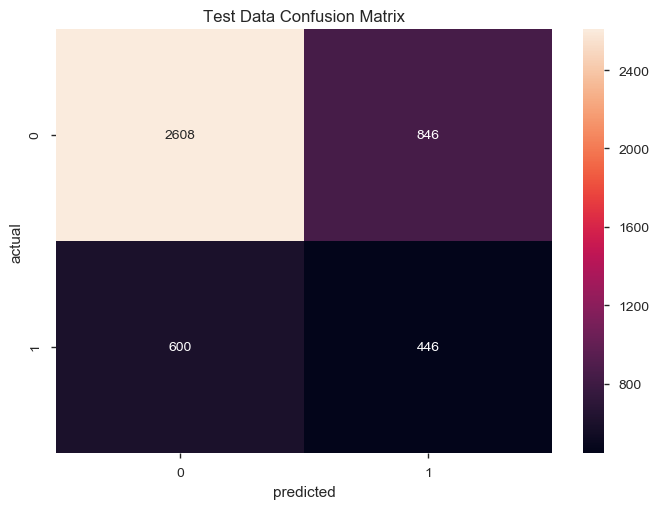

In [714]:
test_predicted_prob = pd.DataFrame(result.predict(test_x))
test_predicted_prob.columns = ['prob']
test_actual = test_x['left']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
#test_predict.head()


test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.26 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.26 else 0)
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
title('Train Data Confusion Matrix')
show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [717]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

('The overall accuracy score for the Train Data is : ', 0.814077531193447)
('The overall accuracy score for the Test Data  is : ', 0.6786666666666666)


In [719]:
train_predict.columns

Index([u'actual', u'prob', u'predicted'], dtype='object')